In [ ]:
###Downloading data from Kaggle and extracting

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "toothlessam"
os.environ['KAGGLE_KEY'] = "dba17dfb2004846dad4ecd9c057cd213"

In [4]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

 98% 761M/778M [00:08<00:00, 189MB/s]
100% 778M/778M [00:08<00:00, 99.0MB/s]


In [5]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

###Understanding covid dataset
-Extracted data contains various images for Covd, Lung opacity, Viral Pneumonia etc.

-Considering only Covid data for classification

In [7]:
os.listdir("COVID-19_Radiography_Dataset/COVID/")

['masks', 'images']

In [8]:
len(os.listdir("COVID-19_Radiography_Dataset/COVID/images/"))

3616

In [9]:
len(os.listdir("COVID-19_Radiography_Dataset/Normal/images/"))

10192

The number of covid and normal images are not balanced.

In [6]:
import cv2
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread("COVID-19_Radiography_Dataset/COVID/images/COVID-10.png")

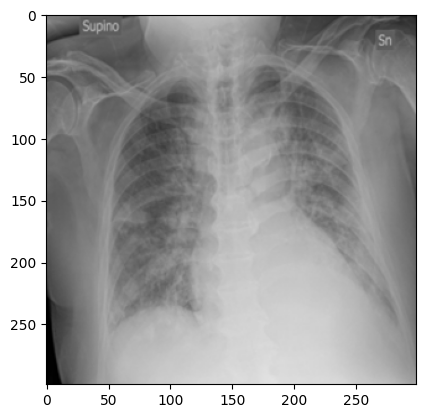

In [15]:
plt.imshow(img)

In [16]:
img.shape

(299, 299, 3)

-Check the dataset info or compare all images to see if they are of same size.

-Else need to resize the images

-This dataset has all images as 299x299

###Loading data

In [2]:
import pandas as pd
import numpy as np

In [18]:
covid_metadata = pd.read_excel("COVID-19_Radiography_Dataset/COVID.metadata.xlsx")

In [19]:
covid_metadata.head

<bound method NDFrame.head of        FILE NAME FORMAT     SIZE  \
0        COVID-1    PNG  256*256   
1        COVID-2    PNG  256*256   
2        COVID-3    PNG  256*256   
3        COVID-4    PNG  256*256   
4        COVID-5    PNG  256*256   
...          ...    ...      ...   
3611  COVID-3612    PNG  256*256   
3612  COVID-3613    PNG  256*256   
3613  COVID-3614    PNG  256*256   
3614  COVID-3615    PNG  256*256   
3615  COVID-3616    PNG  256*256   

                                                    URL  
0     https://sirm.org/category/senza-categoria/covi...  
1     https://sirm.org/category/senza-categoria/covi...  
2     https://sirm.org/category/senza-categoria/covi...  
3     https://sirm.org/category/senza-categoria/covi...  
4     https://sirm.org/category/senza-categoria/covi...  
...                                                 ...  
3611  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3612  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3613  https://b

In [16]:
#loading images
def loadImages(path, target):
  images = []
  labels = []
  img_names = os.listdir(path)
  for i in range(len(os.listdir(path))):
    img_path = path + img_names[i]
    img = cv2.imread(img_path)
    #if images need to be resized - pick a common size for all images
    img = cv2.resize(img, (100,100))
    #print(img_path)
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels



In [17]:
covid_images, covid_labels = loadImages("COVID-19_Radiography_Dataset/COVID/images/", 1)

In [18]:
normal_images, normal_labels = loadImages("COVID-19_Radiography_Dataset/Normal/images/", 0)

In [19]:
print(len(covid_images))

print(len(normal_images))

3616
10192


Convert the list to numpy array

In [38]:
#done in the loading function
#covid_images = np.asarray(covid_images)
#normal_images = np.asarray(normal_images)

In [43]:
covid_images.shape

(3616, 299, 299, 3)

In [44]:
normal_images.shape

(10192, 299, 299, 3)

Merge the image arrays into one using numpy



In [20]:
data = np.r_[covid_images, normal_images]

In [24]:
targets = np.r_[covid_labels, normal_labels]

In [21]:
data.shape

(13808, 100, 100, 3)

In [25]:
targets.shape

(13808,)

In [22]:
del(covid_images)
del(normal_images)

###Classification of images

In [27]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [31]:
x_train_shape = x_train.shape[1:]

one thing to try is balance the covid and normal data with same number of entries

In [37]:
model = Sequential([
    Conv2D(32, 3, input_shape=x_train_shape, activation="relu"),
    MaxPool2D(),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 16)      

In [41]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
324/324 [==============================] - 15s 10ms/step - loss: 0.5908 - accuracy: 0.8070 - val_loss: 0.3478 - val_accuracy: 0.8389
Epoch 2/5
324/324 [==============================] - 3s 9ms/step - loss: 0.2857 - accuracy: 0.8711 - val_loss: 0.3001 - val_accuracy: 0.8627
Epoch 3/5
324/324 [==============================] - 3s 9ms/step - loss: 0.2529 - accuracy: 0.8921 - val_loss: 0.2903 - val_accuracy: 0.8783
Epoch 4/5
324/324 [==============================] - 3s 9ms/step - loss: 0.2064 - accuracy: 0.9107 - val_loss: 0.2143 - val_accuracy: 0.9145
Epoch 5/5
324/324 [==============================] - 4s 13ms/step - loss: 0.1765 - accuracy: 0.9280 - val_loss: 0.2203 - val_accuracy: 0.9105


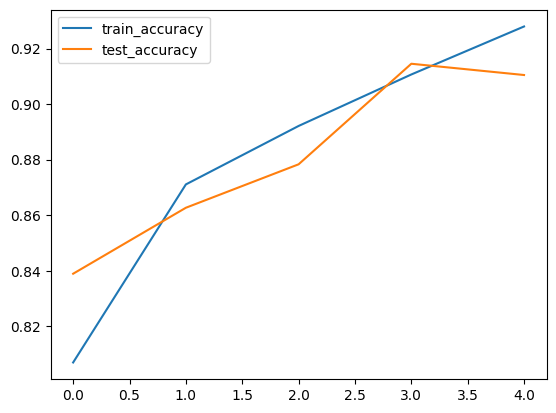

In [44]:
plt.plot(model.history.history['accuracy'], label="train_accuracy")
plt.plot(model.history.history['val_accuracy'], label = "test_accuracy")
plt.legend()
plt.show()

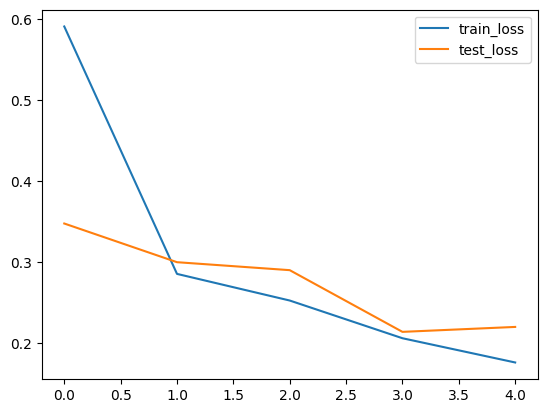

In [45]:
plt.plot(model.history.history['loss'], label="train_loss")
plt.plot(model.history.history['val_loss'], label = "test_loss")
plt.legend()
plt.show()